In [33]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [34]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [35]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [36]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [37]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(engine,reflect = True)

In [38]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [39]:
# Save references to each table
measurement = base.classes.measurement
station = base.classes.station

In [40]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [41]:
inspector = inspect(engine) 
inspector.get_table_names()
columns = inspector.get_columns('measurement')
for i in columns:
    print(i['name'])


id
station
date
prcp
tobs


In [42]:
columns = inspector.get_columns('station')
for j in columns:
    print(j['name'])

id
station
name
latitude
longitude
elevation


In [43]:
# Find the most recent date in the data set.
most_recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
print(most_recent_date)

('2017-08-23',)


2016-08-23


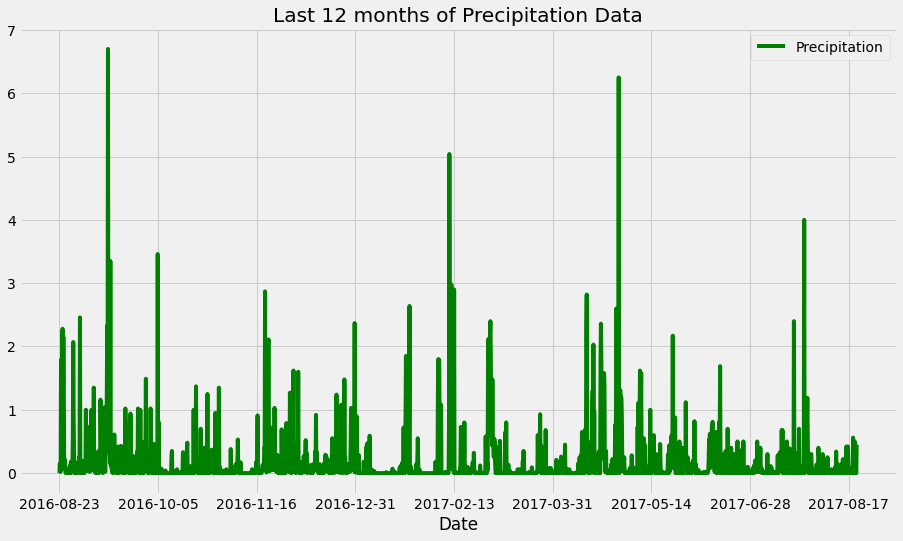

In [44]:
# Design a query to retrieve the last 12 months of 
# precipitation data and plot the results. 

# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.

one_year_prior = dt.date(2017,8,23) - dt.timedelta(days = 365)
print(one_year_prior)

# Perform a query to retrieve the data and precipitation scores

date_precip = session.query(measurement.date,measurement.prcp).\
filter(measurement.date >= one_year_prior,measurement.prcp != None).\
order_by(measurement.date).all()

# Save the query results as a Pandas DataFrame and 
# set the index to the date column
df=pd.DataFrame(date_precip, columns = ['Date','Precipitation'])
df.set_index('Date',inplace = True)
df.head()
# Sort the dataframe by date
df_sorted = df.sort_values(by = 'Date')

# Use Pandas Plotting with Matplotlib to plot the data
df_sorted.plot(figsize = (14,8), color = "green")
plt.title("Last 12 months of Precipitation Data")
plt.show()



In [45]:
# Use Pandas to calculate the summary statistics for the precipitation data
df_sorted.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [46]:
# Design a query to calculate the total number stations in the dataset
num_stations = session.query(measurement.station).distinct().count()
num_stations

9

In [47]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
most_active_stations = session.query(measurement.station,func.count(measurement.station)).\
group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [48]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_act_temp = session.query(func.min(measurement.tobs),func.max(measurement.tobs),func.avg(measurement.tobs)).\
filter(measurement.station == 'USC00519281').all()
most_act_temp

[(54.0, 85.0, 71.66378066378067)]

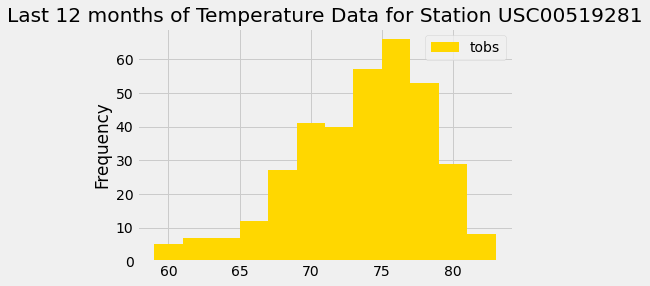

In [49]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station.\ and plot the results as a histogram
# and plot the results as a histogram
date_tobs = session.query(measurement.tobs).\
filter(measurement.date >= one_year_prior,measurement.station == 'USC00519281').\
order_by(measurement.date).all()
# Save the query results as a Pandas DataFrame and set the index to the date column
df=pd.DataFrame(date_tobs, columns = ['tobs'])
bins = 12
df.plot.hist(date_tobs,bins, color = "gold")
plt.title("Last 12 months of Temperature Data for Station USC00519281")
plt.show()

# Close session

In [51]:
# Close Session
session.close()